# Homework 2 - Modeling Coaches Salaries
*Author: Daniel Carpenter*

---

## Purpose of File:

Import Football datasets to predict:
- recommended salary for the OU football coach
- appropriate salary be if OU moved to the SEC
- single biggest impact on salary size

## Import some common packages

In [53]:
import pandas  as pd
import numpy   as np
import seaborn as sns # Plots

## Import data from https://github.com/BoomerPython/data
*Data automatically in form of data frame when using `pandas`*

In [41]:
# Data for the coaches dataset
Coaches = pd.read_csv('https://raw.githubusercontent.com/BoomerPython/data/main/coaches_bp_dsa.csv')

# Data for the Stadiums dataset
Stadiums = pd.read_csv('https://raw.githubusercontent.com/BoomerPython/data/main/stadium_bp_dsa.csv')

# Data for the Team Statistics dataset
TeamStats = pd.read_csv('https://raw.githubusercontent.com/BoomerPython/data/main/stats_bp_dsa.csv')

## Build a data frame for your analysis incuding data pulled in above
1. Join the three above datasets together on the identifiers `School` and `Conf`
2. Drop null values in dataset (see description in line comments)
3. Trim and clean data (strings to float, etc.)

In [42]:
# Left Join dataframs: Coaches to Stadiums 
df = pd.merge(Coaches, Stadiums, 
              on = ['School', 'Conf'], # Keys to join to
              how = 'left')            # Left join

# Left Join above df to TeamStats
df = pd.merge(df, TeamStats, 
              on = ['School', 'Conf'], # Keys to join to
              how = 'left')            # Left join

# Drop null values from dataset since will not work with model ----------------

## Create a copy of the schools before removing the NAs
allSchools = df[:]

## Drop the schools with NAs
colsDropped = df.isna().sum()
print('\nSummary of NA values present by column in data frame:', colsDropped)
df = df.dropna()

## Capture a copy of a list of the removed schools
removedSchools = allSchools[~allSchools['School'].isin(df['School'])]['School'].unique()



# Trim the column names and rename some for coding ease -----------------------
## Note there was whitespace in the column names
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns = {'Graduation Rate (GSR)': 'GradRate',
                          'Defense Score':         'DefenseScore',
                          'OffenceScore':          'OffenseScore',
                          'W':                     'WinRecord',
                          'L':                     'LossRecord',
                          'Ratio':                 'WinLossRatio',
                          'Conf':                  'Conference'})

## View the changes
print('\n', df.columns)


# Convert Non-Numeric Columns to Numeric that should be -----------------------

## Trim out whitespace
df['TotalPay'] = df['TotalPay'].str.strip()
df['StadSize'] = df['StadSize'].str.strip()

## Stadium size: Convert to type float
df['StadSize'] = df['StadSize'].str.replace(',', '').astype(float)

## Total Pay of coach: Convert to type float
### First remove commas 
df['TotalPay'] = df['TotalPay'].str.replace(',', '')

### Remove $ signs and convert to number
df['TotalPay'] =  pd.to_numeric(df['TotalPay'].str.replace('$', '').astype(float),
                                errors = 'coerce')

### View changes
print('\n', df.head())


Summary of NA values present by column in data frame: School                      0
Conf                        0
Coach                       0
 TotalPay                   5
 Graduation Rate (GSR)      0
 StadSize                   0
W                          11
L                          11
 Ratio                     11
OffenceScore               11
Defense Score              11
Score                      11
PointsPerGame              11
dtype: int64

 Index(['School', 'Conference', 'Coach', 'TotalPay', 'GradRate', 'StadSize',
       'WinRecord', 'LossRecord', 'WinLossRatio', 'OffenseScore',
       'DefenseScore', 'Score', 'PointsPerGame'],
      dtype='object')

               School Conference              Coach   TotalPay  GradRate  \
0          Air Force   Mt. West       Troy Calhoun   885000.0        83   
1              Akron        MAC       Terry Bowden   412500.0        45   
2            Alabama        SEC         Nick Saban  8307000.0        79   
3  Appalachian State   S

C:\Users\DANIEL~1.CAR\AppData\Local\Temp/ipykernel_38544/2983478437.py:55: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalPay'] =  pd.to_numeric(df['TotalPay'].str.replace('$', '').astype(float),


## Conduct an initial data analysis - develop appropriate visualizations

### Pairs plots (Overview)
* [Click link to see recources](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Text(0.5, 0.98, 'Pair Plot of all Conferences. Note Stadium Size and Score')

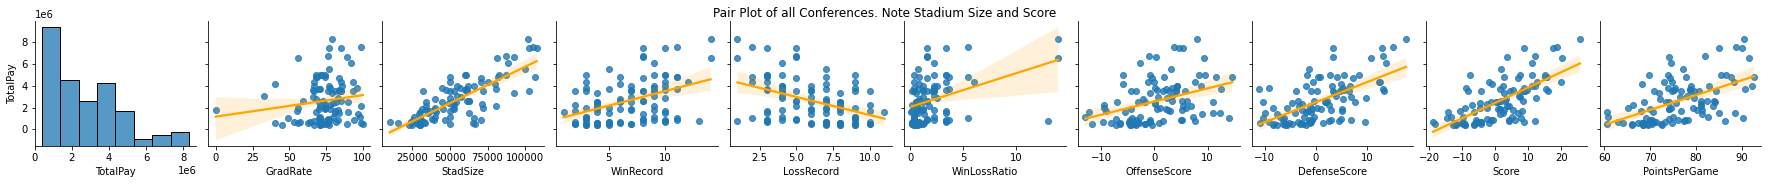

In [43]:
## Initial Look to see how variables correlate with pay -----------------------
allConfs = sns.pairplot(df, y_vars=['TotalPay'], 
                        kind="reg", # add Regression line
                        plot_kws={'line_kws':{'color':'orange'}} 
                        )

allConfs.fig.suptitle('Pair Plot of all Conferences. Note Stadium Size and Score')

### Pairs plots (By Conference)

Analysis:
* Most larger conferences follow slightly similar trend to the overall dataset
* Would be wary of analyzing changes to a smaller conference since such limited number of samples
* Should be fine to create a model with all conferences and/or bigger conferences

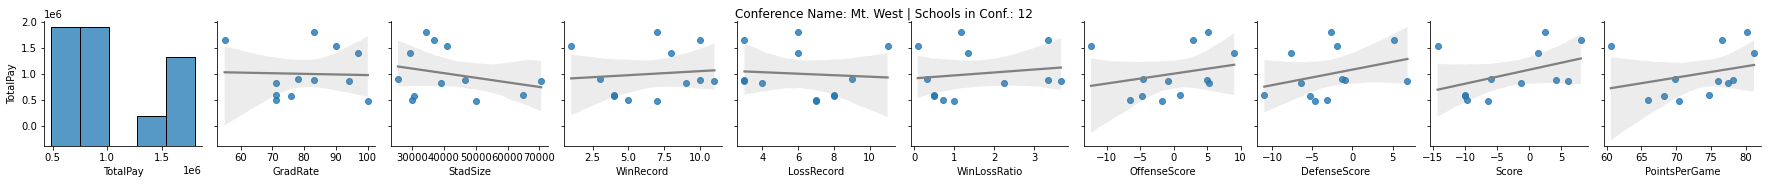

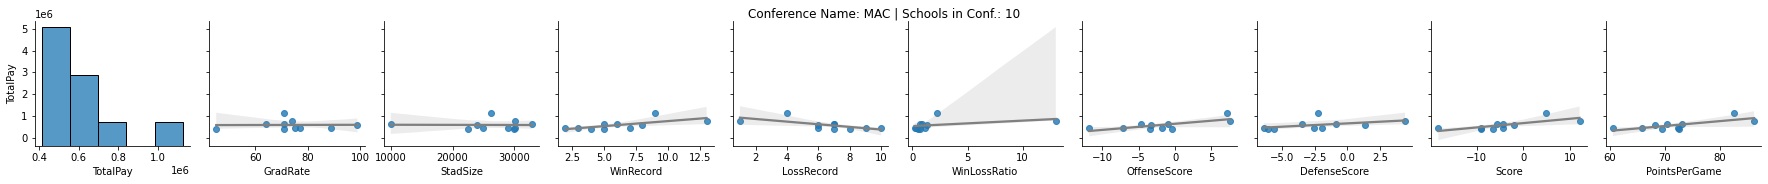

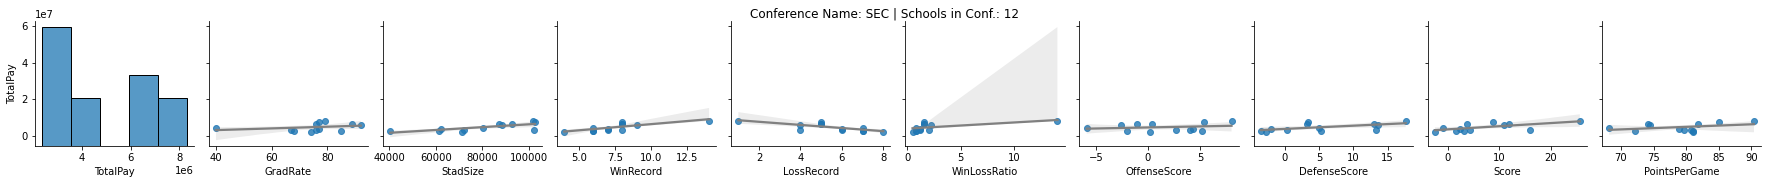

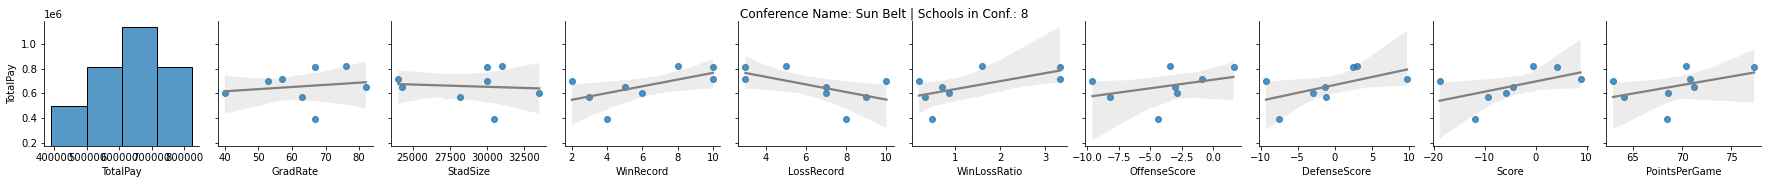

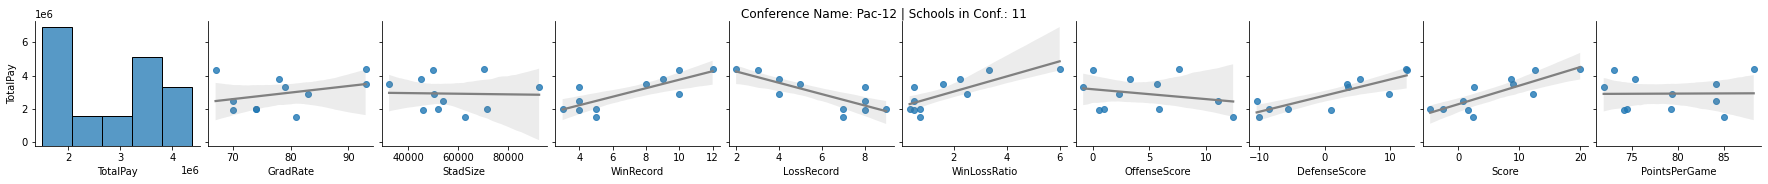

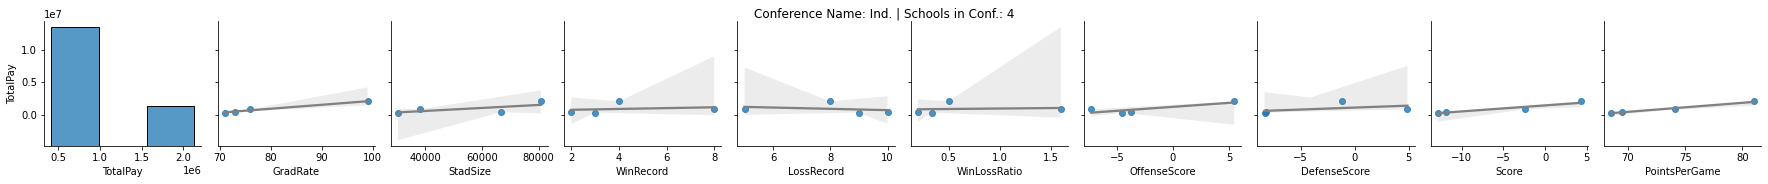

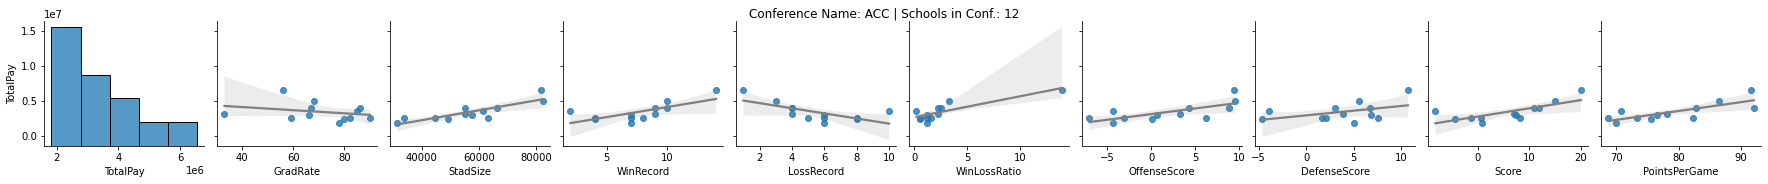

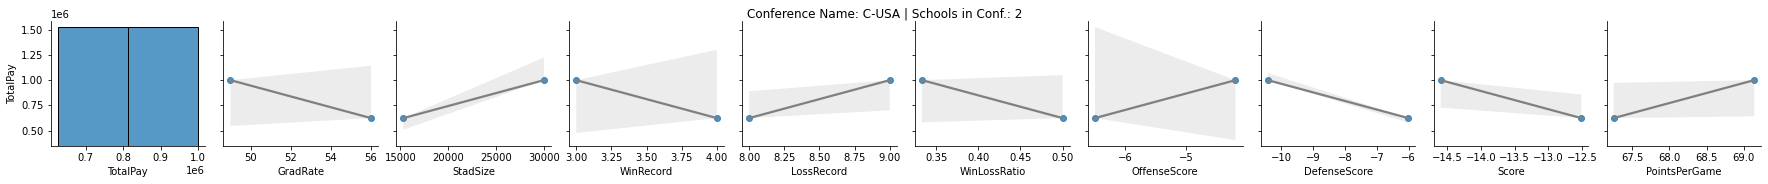

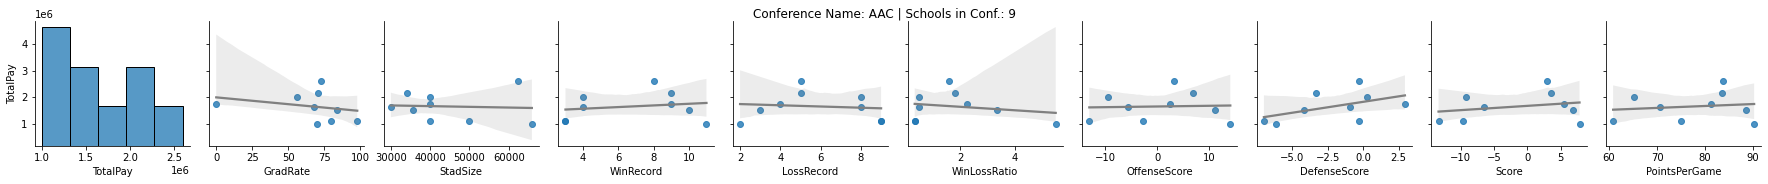

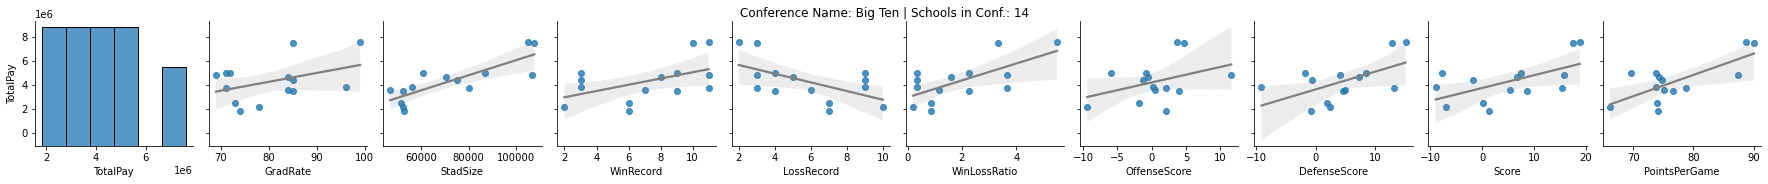

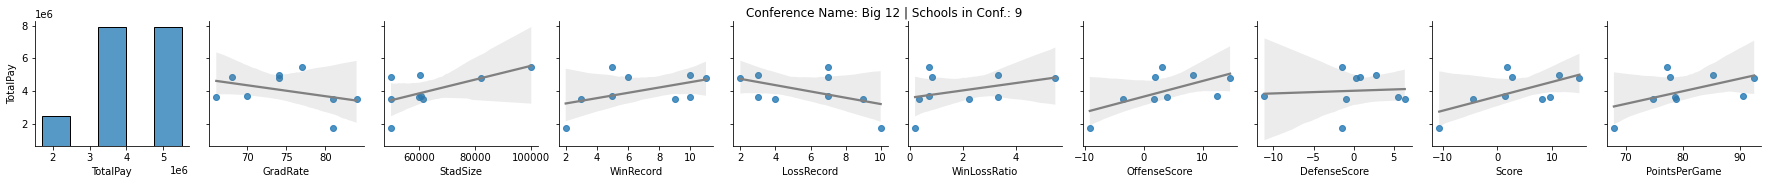

In [44]:
## Does the conference have anything to do? -----------------------------------

### Get Unique list of conferences to iterate over
uniqueConferences = df['Conference'].unique()

### Plot each conference to see if each conference holds to overall trends
for conference in uniqueConferences:
    
    # Filter dataframe to conference
    df_tempConf = df[df['Conference'] == conference]
    
    # Pair plot of JUST the conference
    thePlot = sns.pairplot(df_tempConf, 
                           kind="reg", # add Regression line
                           plot_kws={'line_kws':{'color':'gray'}},
                           y_vars=['TotalPay']
                           )

    # Add some titles
    thePlot.fig.suptitle("Conference Name: " + conference + " | Schools in Conf.: " + str(len(df_tempConf['School'])))


### See the distribution of salaries

#### Distribution Overview
* Median around $2MM in salary
* High spread so would like to see if any categorical reasoning for that, such as spread amongst conferences.

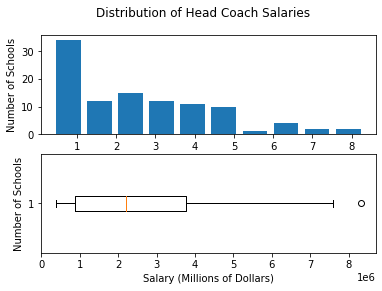

In [45]:
import matplotlib.pyplot as plt # for plots

## Create the figure
fig, axs = plt.subplots(2, 1, constrained_layout=False)

## The title of the figure
fig.suptitle("Distribution of Head Coach Salaries")

## A histogram of salaries
axs[0].hist(df['TotalPay'], density = False, stacked = False, rwidth = .8)
axs[0].set_ylabel('Number of Schools')

## A boxplot of salaries
axs[1].boxplot(df['TotalPay'], vert=False)
axs[1].set_xlabel('Salary (Millions of Dollars)')
axs[1].set_ylabel('Number of Schools')

plt.show()

#### Distribution of Salary by Conference
* Conferences seem to exhibit disparities in salary pay
* Wide spread distribution in SEC

Text(0.5, 0, 'Salary (Millions of Dollars)')

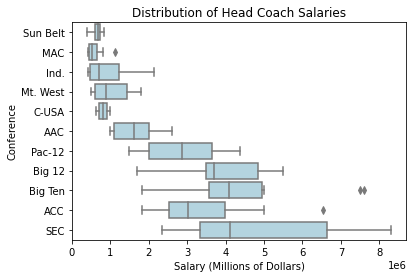

In [46]:
# Boxplot by conference -------------------------------------------------------
bplots = sns.boxplot(y="Conference", x="TotalPay", color = "lightblue",
                     data=df.sort_values(by="TotalPay"))
bplots.set_title('Distribution of Head Coach Salaries')
bplots.set_xlabel('Salary (Millions of Dollars)')

## Fit a regression model with the salary as the response variable
* Note Did not include `LossRecord` or `WinLossRatio` since multicolinearity with `WinRatio`
* Note Did not include `Score` since potential colinearity with `Points` per game

In [47]:
import statsmodels.formula.api as smf # Linear regression package

# Create the model
# Note Did not include LossRecord or WinLossRatio since multicolinearity
# Note Did not include Score since potential colinearity with Points per game
model = smf.ols(formula='TotalPay ~ Conference + GradRate + StadSize + WinRecord + OffenseScore + DefenseScore + PointsPerGame',
                data=df)

# The estimation using OLS - tried GLM but similar results
est = model.fit()

# Show the fitted model
print(est.summary())

# Get the coefficients
coefsRaw = est.params      # As series
coefs = np.array(coefsRaw) # AS np array

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     27.67
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.62e-27
Time:                        16:36:07   Log-Likelihood:                -1543.7
No. Observations:                 103   AIC:                             3121.
Df Residuals:                      86   BIC:                             3166.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.23

## What is the recommended salary for the OU football coach?

### First create a function to:
* compare salary of a given school to its estimated salary based on data
* also perform what if analysis with the conference. E.g. move a coach to another conf.

In [48]:
# Create a function to compare salary of a given school to its estimated salary based on data
# Also can perform what if analysis with the conference. E.g. move a coach to another conf.
def estimateCoachSalary(chosenSchool,    # The school to see check estiamted salary of
                        whatIfConference # Can change the conference to see if salary changes
                        ):

    # Filter to the chosen school
    school_Stats = df.query("School == @chosenSchool")
    
    # Input paramaters of the school
    school_Conference    = 'Conference[T.' + whatIfConference +']'
    school_Coach         = str(np.array(school_Stats['Coach'])[0])
    school_TotalPay      = float(school_Stats['TotalPay'])
    school_GradRate      = float(school_Stats['GradRate'])
    school_StadSize      = float(school_Stats['StadSize'])
    school_WinRecord     = float(school_Stats['WinRecord'])
    school_OffenseScore  = float(school_Stats['OffenseScore'])
    school_DefenseScore  = float(school_Stats['DefenseScore'])
    school_PointsPerGame = float(school_Stats['PointsPerGame'])
    
    # Input paramaters of the school in list
    school_Params = [1, 1, # To indicate intercept and conference
                     school_GradRate, school_StadSize,  school_WinRecord, 
                     school_OffenseScore,  school_DefenseScore, school_PointsPerGame]
    
    
    tailoredCoefs = [] # To hold a list of tailored coefficients
    
    for variable in range(len(coefsRaw)):
    
        indexName     = coefsRaw.index[variable]    
        variableToAdd = coefs[variable]
    
        # Only add if in the right conference
        if not (indexName.startswith("Conference") and not indexName == school_Conference):
            tailoredCoefs.append(variableToAdd)
    
    
    # Now calculate the expected salary by doing matrix multipication
    estSalary = np.dot(np.array(tailoredCoefs), np.array(school_Params))
    
    # Summary of if overpaid
    isOverpaid = estSalary < school_TotalPay
    if isOverpaid: paidOverUnder = 'overpaid' 
    else: paidOverUnder = 'underpaid'
    
    # Summary of salary
    print('\nThe estimated (modeled) salary of', chosenSchool, 'in the', whatIfConference,
          'is $', '{:,.2f}'.format(estSalary),
          '\nCurrently,', chosenSchool, 'pays $', '{:,.0f}'.format(school_TotalPay),
          '\n Therfore,', school_Coach, 'is', paidOverUnder)
    
    # Return the estimated salary
    return estSalary

### Now estimate OU Salary
* See below for automated results

In [49]:
# Check the estimated salary of Oklahoma coach 
estimateCoachSalary(chosenSchool = 'Oklahoma',
                    whatIfConference = 'Big 12')


The estimated (modeled) salary of Oklahoma in the Big 12 is $ 4,902,342.82 
Currently, Oklahoma pays $ 4,800,000 
 Therfore, Lincoln Riley is underpaid


4902342.821037227

## What would the appropriate salary be if OU moved to the SEC?
* See below for automated results

In [50]:
# Change the conference of OU to the SEC
estimateCoachSalary(chosenSchool = 'Oklahoma',
                    whatIfConference = 'SEC')


The estimated (modeled) salary of Oklahoma in the SEC is $ 4,890,450.47 
Currently, Oklahoma pays $ 4,800,000 
 Therfore, Lincoln Riley is underpaid


4890450.473216997

## What schools did we drop from our data and why?
* See below for automated results
* Below shows the schools dropped from the sample 
* The schools contain null values which would cause issues with modeling

In [51]:
print('\nBelow shows the schools dropped from the sample since there were null values:\n',
      removedSchools)


Below shows the schools dropped from the sample since there were null values:
 ['Baylor' 'Bowling Green' 'Brigham Young' 'Central Florida'
 'Coastal Carolina' 'Liberty' 'Louisiana-Lafayette' 'Miami (Fla.)'
 'Miami (Ohio)' 'Mississippi' 'Pittsburgh' 'Southern California'
 'Southern Methodist' 'Temple' 'Tennessee']


## What is the single biggest impact on salary size?
* See below for automated results
* Note that big 12 coefficient has a statistically signifcant t-value
* Model also has very high R squared, indicating that most of the variation in the independant variables explain the dependant variable.


In [52]:
# Get the most impactful parameter (max) - note not best fit, highest value
maxValue         = max(coefs)                  # The coefficient of the most impactful
idxOfMaxValue    = np.where(coefs == maxValue) # The idx of the max value
mostImpactfulVar = coefsRaw.index[idxOfMaxValue]     # The most impactful variable and value

print('\nThe most impactful variable is:', mostImpactfulVar[0], 
      '\nI.e., being in the', mostImpactfulVar[0], 
      'correlates with an increase in salary of $', '{:,.2f}'.format(maxValue),
      '\nPlease not that this does not consider the statistical significance.')


The most impactful variable is: Conference[T.Big 12] 
I.e., being in the Conference[T.Big 12] correlates with an increase in salary of $ 1,563,196.39 
Please not that this does not consider the statistical significance.
